In [0]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
def normalization(images):
    images = images.reshape(-1, 3072)
    each_pixel_mean = images.mean(axis=0)
    each_pixel_std = np.std(images, axis=0)
    images = np.divide(np.subtract(images, each_pixel_mean), each_pixel_std)
    return images.reshape(-1, 32, 32, 3)

In [0]:
training_images, training_labels = normalization(x_train), y_train
test_images, test_labels = normalization(x_test), y_test

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [0]:
def reshapedata(training_images,test_images):
    n_samples = len(training_images)
    n_samples_test = len(test_images)
    training_images = training_images.reshape((n_samples,-1))
    test_images = test_images.reshape((n_samples_test,-1))
    return training_images,test_images
def applyPCA(trainingdata,ncomponents):
    pca = PCA(ncomponents)
    x_image = pca.fit_transform(trainingdata)
    return x_image

In [20]:
#set PCA n_component=10
def gaussianNB_chosed(training_images,training_labels,test_images,test_labels):
    training_images,test_images=reshapedata(training_images,test_images)
    training_images = applyPCA(training_images,10)
    test_images = applyPCA(test_images,10)
    clf = GaussianNB()
    clf.fit(training_images, training_labels)
    predict_label=clf.predict(test_images)
    accuracy = accuracy_score(test_labels,predict_label)
    return predict_label,accuracy

predict_labels,accuracy = gaussianNB_chosed(training_images,training_labels,test_images,test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
test_labels = y_test.T[0]

In [22]:

def confusion_matrix(actual, predict):
    cmatrix = np.zeros((10, 10)).astype(int)
    for i in range(10000):
        if actual[i] == predict[i]:
            cmatrix[actual[i]][actual[i]] += 1
        else:
            cmatrix[actual[i]][predict[i]] += 1
    return cmatrix

cm = confusion_matrix(test_labels, predict_labels)
print(cm)
print("Accuracy = {:>6.4f}".format(cm.diagonal().sum()*1.0/cm.sum()))

[[417  47  65  33  60  15  60  29 191  83]
 [ 59 277  47  41  66  43 107  55 115 190]
 [104  57 135  63 226  48 222  55  46  44]
 [ 37  81  95 140 134 156 162  99  22  74]
 [ 38  34  96  32 347  37 279  66  25  46]
 [ 36  51  85 117 109 286 150  91  29  46]
 [ 17  47  62  53 190  50 482  51   7  41]
 [ 37  54  65  62 180  80 138 217  39 128]
 [142  71  23  26  52  57  24  25 457 123]
 [ 47 130  40  28  71  29  60  63 128 404]]
Accuracy = 0.3162


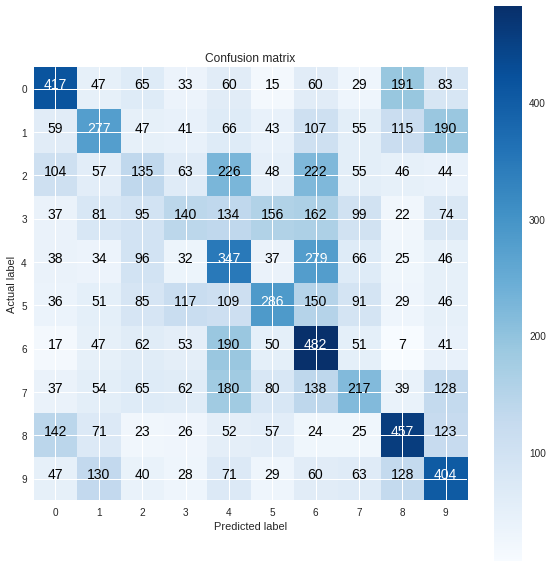

In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, label_num):
    labels = range(label_num)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    marks = np.arange(len(labels))
    plt.xticks(marks, labels)
    plt.yticks(marks, labels)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]), fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, 10)

In [24]:

def evaluation(cmatrix):
    print("|  Label  | Precision | Recall | F-Score |")
    total_p = 0
    total_r = 0
    total_f = 0
    for i in range(10):
        precision = cmatrix[i, i]*1.0/cmatrix[:, i].sum()
        recall = cmatrix[i, i]*1.0/cmatrix[i, :].sum()
        fscore = precision*recall*2.0/(precision+recall)
        total_p += precision
        total_r += recall
        total_f += fscore
        print('|{:>8d} | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(i, precision, recall, fscore))
    print('| Average | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(total_p/10.0, total_r/10.0, total_f/10.0))

evaluation(cm)

|  Label  | Precision | Recall | F-Score |
|       0 |    0.4465 | 0.4170 |  0.4312 |
|       1 |    0.3263 | 0.2770 |  0.2996 |
|       2 |    0.1893 | 0.1350 |  0.1576 |
|       3 |    0.2353 | 0.1400 |  0.1755 |
|       4 |    0.2418 | 0.3470 |  0.2850 |
|       5 |    0.3571 | 0.2860 |  0.3176 |
|       6 |    0.2862 | 0.4820 |  0.3592 |
|       7 |    0.2889 | 0.2170 |  0.2479 |
|       8 |    0.4315 | 0.4570 |  0.4439 |
|       9 |    0.3427 | 0.4040 |  0.3708 |
| Average |    0.3146 | 0.3162 |  0.3088 |


In [34]:
#crossvalidation

def evaluation(scores):
    print("|Folder No.|   Score   |")
    scoreave = 0
    for i in range(10):
        thescore = scores[i]
        scoreave = scoreave+scores[i]
        print('|{:>9d} | {:>9.4f} |'.format(i, thescore))
    print('| Average  | {:>9.4f} |'.format(scoreave/10.0))
        
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
training_images,test_images = reshapedata(training_images,test_images)
training_images = applyPCA(training_images,10)
scores = cross_val_score(clf, training_images, training_labels, cv=10)

evaluation(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

|Folder No.|   Score   |
|        0 |    0.3314 |
|        1 |    0.3334 |
|        2 |    0.3402 |
|        3 |    0.3300 |
|        4 |    0.3302 |
|        5 |    0.3308 |
|        6 |    0.3198 |
|        7 |    0.3292 |
|        8 |    0.3238 |
|        9 |    0.3266 |
| Average  |    0.3295 |


In [33]:
def evaluation(scores):
    print("|Folder No.|   Score   |")
    scoreave = 0
    for i in range(10):
        thescore = scores[i]
        scoreave = scoreave+scores[i]
        print('|{:>9d} | {:>9.4f} |'.format(i, thescore))
    print('| Average  | {:>9.4f} |'.format(scoreave/10.0))
    
evaluation(scores)

|Folder No.|   Score   |
|        0 |    0.3314 |
|        1 |    0.3334 |
|        2 |    0.3402 |
|        3 |    0.3300 |
|        4 |    0.3302 |
|        5 |    0.3308 |
|        6 |    0.3198 |
|        7 |    0.3292 |
|        8 |    0.3238 |
|        9 |    0.3266 |
| Average  |    0.3295 |
